In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the data
df = pd.read_csv('/content/train.csv')

In [13]:
# Data Cleaning
print("Initial shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)  # Too many missing values

# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'])

print("\nShape after cleaning:", df.shape)
print("\nMissing values after cleaning:\n", df.isnull().sum())

Initial shape: (891, 12)

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Shape after cleaning: (891, 13)

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


Exploratory Data Analysis

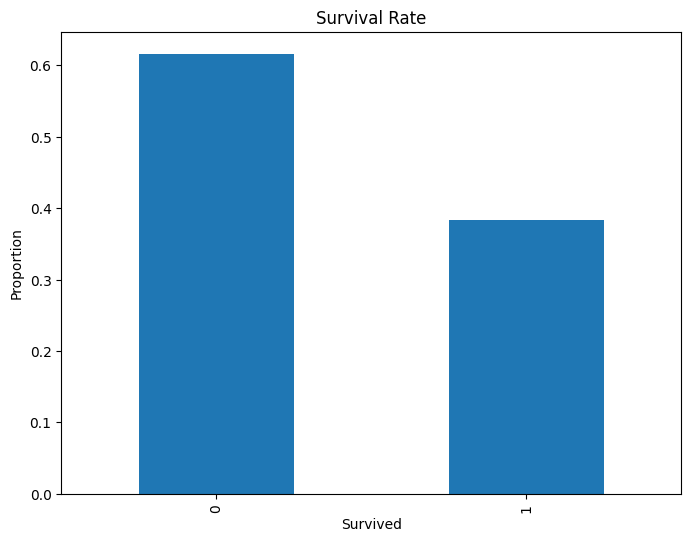

In [14]:
# Survival rate
plt.figure(figsize=(8, 6))
df['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Survival Rate')
plt.ylabel('Proportion')
plt.show()

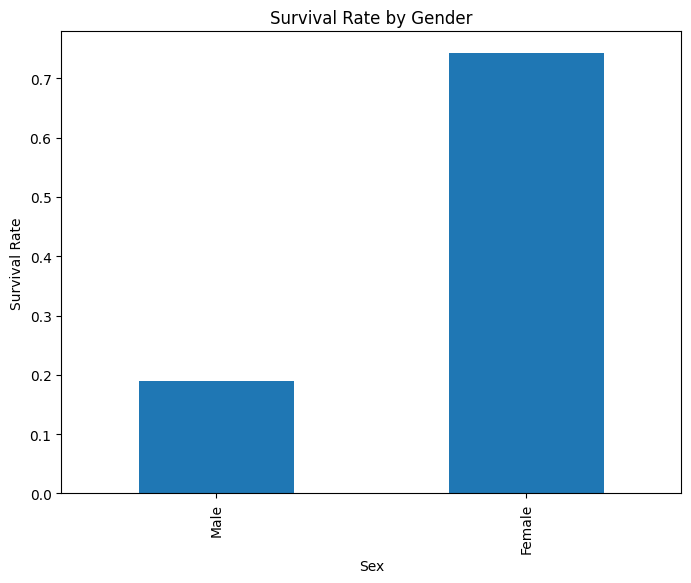

In [15]:
# Survival rate by gender
plt.figure(figsize=(8, 6))
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

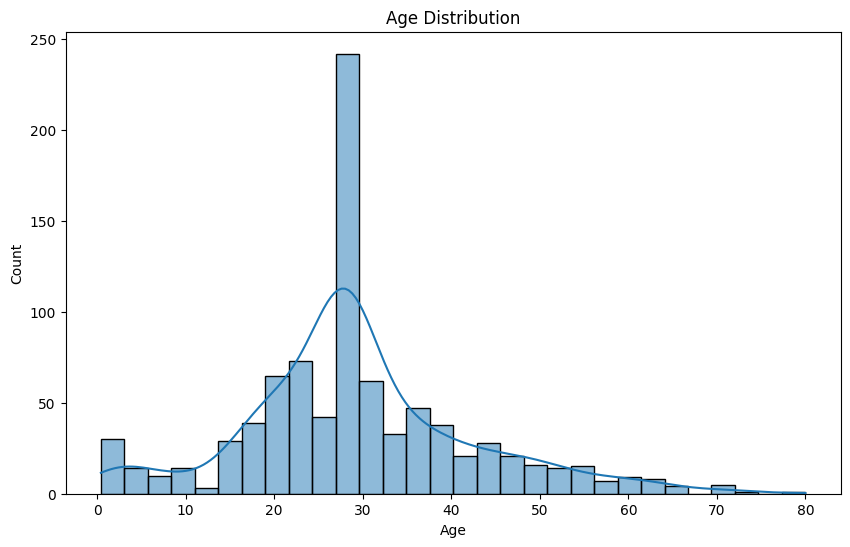

In [16]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

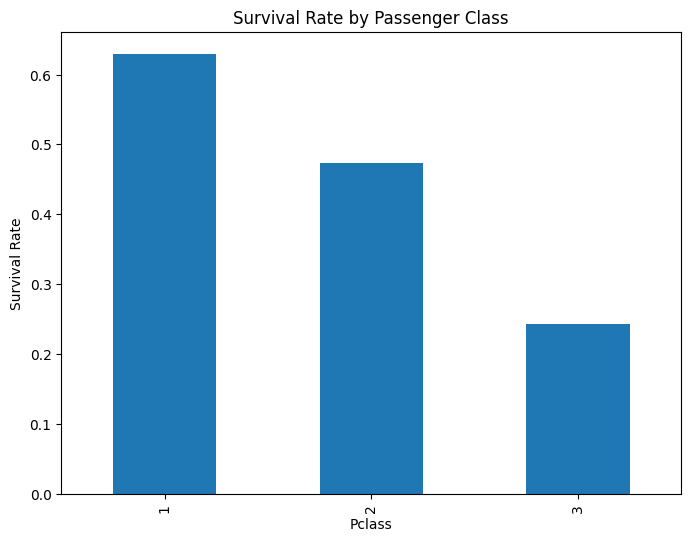

In [17]:
# Survival rate by passenger class
plt.figure(figsize=(8, 6))
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

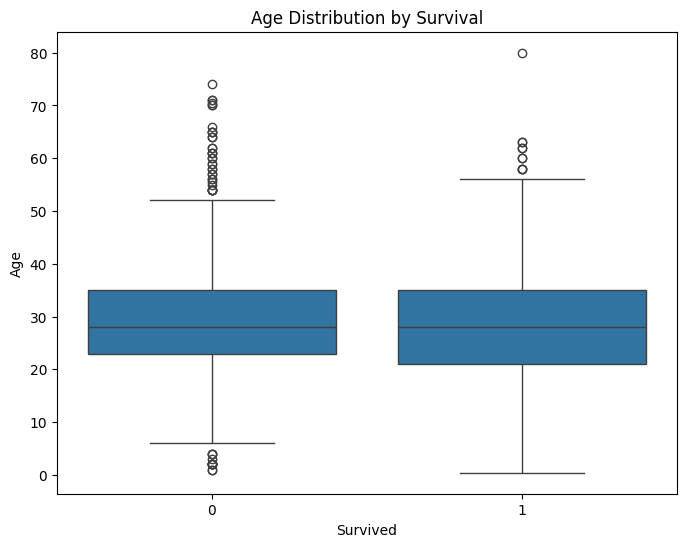

In [18]:
# Box plot of Age vs Survived
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

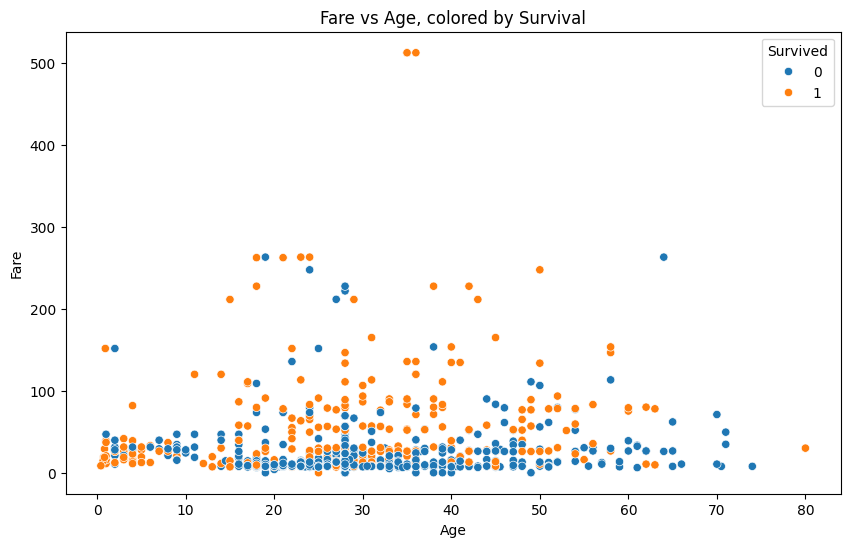

In [19]:
# Scatter plot of Fare vs Age, colored by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Age, colored by Survival')
plt.show()

In [20]:
# Print some summary statistics
print("\nSummary Statistics:")
print(df.describe())

print("\nSurvival Rate by Passenger Class:")
print(df.groupby('Pclass')['Survived'].mean())

print("\nSurvival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())


Summary Statistics:
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.00000